The notebook presents simple examples to get started with training a fully-connected neural network.

* Neurons, layers and activation functions (Chapter 1)
* Learning a simple function (Chapter 2)  
* Learning a function that converts from cartesian to polar coordinates (Chapter 3)
* Saving and reusing a model (Chapter 4)

It takes inpiration from [Pytorch Hello World](https://colab.research.google.com/drive/1ac0K9_aa46c77XEeYtaMAfSOfmH1Bl9L) (Elvis Saravia) and [Hello-ML-World](https://colab.research.google.com/github/lmoroney/mlday-tokyo/blob/master/Lab1-Hello-ML-World.ipynb) (Laurence Moroney).

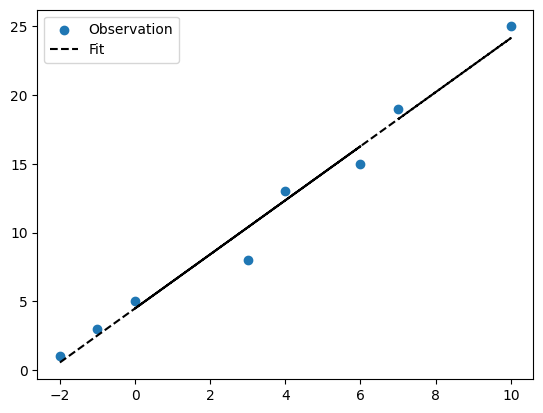

In [219]:
import matplotlib.pyplot as plt
import numpy as np
x = [-2, -1, 3, 4, 6, 0, 10, 7]
y = [1, 3, 8, 13, 15, 5, 25, 19]

plt.scatter(x, y, label = "Observation")

coef = np.polyfit(x, y, 1)
poly1d_fn = np.poly1d(coef)
plt.plot(x, poly1d_fn(x), '--k', label = "Fit")
plt.legend()
plt.show()

# Chapter 1: Neurons, Layers and Activations functions

In [220]:
import torch
import torch.nn as nn
import numpy as np

In [261]:
input_features = torch.tensor([[1.5, 8, 2]], dtype=torch.float)
input_features

tensor([[1.5000, 8.0000, 2.0000]])

net input function

In [266]:
single_neuron = nn.Linear(3, 1, bias=True) # 3 features, 1 neuron
single_neuron, single_neuron.weight, single_neuron.weight.shape, single_neuron.bias

(Linear(in_features=3, out_features=1, bias=True),
 Parameter containing:
 tensor([[-0.0863,  0.5566, -0.4259]], requires_grad=True),
 torch.Size([1, 3]),
 Parameter containing:
 tensor([-0.4622], requires_grad=True))

In [267]:
single_neuron(input_features)

tensor([[3.0091]], grad_fn=<AddmmBackward0>)

In [268]:
i_features = [1.5000, 8.0000, 2.0000]
w_i = [-0.0863,  0.5566, -0.4259]
w_0 = -0.4622
(i_features[0] *w_i[0] + i_features[1]*w_i[1] + i_features[2]* w_i[2]) + w_0

3.0093499999999995

activation function

In [269]:
relu = nn.ReLU()
sigmoid = nn.Sigmoid()
tanh = nn.Tanh()

values_tens = torch.tensor([3.0])

print("heaviside: ", torch.heaviside(single_neuron(input_features), values_tens)) # https://docs.pytorch.org/docs/stable/generated/torch.heaviside.html
print("relu: ", relu(single_neuron(input_features)))
print("tanh: ", tanh(single_neuron(input_features)))
print("sigmoid: ", sigmoid(single_neuron(input_features)))

heaviside:  tensor([[1.]], grad_fn=<NotImplemented>)
relu:  tensor([[3.0091]], grad_fn=<ReluBackward0>)
tanh:  tensor([[0.9951]], grad_fn=<TanhBackward0>)
sigmoid:  tensor([[0.9530]], grad_fn=<SigmoidBackward0>)


conlayer (image processing)

In [270]:
conv_layer = nn.Conv2d(in_channels=1, out_channels=1, kernel_size=2, stride=1, padding=1)
conv_layer, conv_layer.weight, conv_layer.weight.shape, conv_layer.bias

(Conv2d(1, 1, kernel_size=(2, 2), stride=(1, 1), padding=(1, 1)),
 Parameter containing:
 tensor([[[[ 0.0537, -0.0279],
           [ 0.4633,  0.2590]]]], requires_grad=True),
 torch.Size([1, 1, 2, 2]),
 Parameter containing:
 tensor([0.2961], requires_grad=True))

linear layer

In [227]:
linear_layer = nn.Linear(3, 4, bias=True) # 3 features, 4 neurons
linear_layer, linear_layer.weight, linear_layer.weight.shape, linear_layer.bias

(Linear(in_features=3, out_features=4, bias=True),
 Parameter containing:
 tensor([[-0.3039, -0.0427,  0.3097],
         [ 0.4082, -0.0512,  0.0620],
         [ 0.0449,  0.3553,  0.2027],
         [-0.4657,  0.1990, -0.5385]], requires_grad=True),
 torch.Size([4, 3]),
 Parameter containing:
 tensor([-0.5075,  0.3784, -0.2092,  0.4670], requires_grad=True))

In [271]:
linear_layer(input_features)

tensor([[-0.6851,  0.7052,  3.1061,  0.2835]], grad_fn=<AddmmBackward0>)

In [272]:
i_features = [1.5000, 8.0000, 2.0000]
w_n_1 =[-0.3039, -0.0427,  0.3097]
w_n_2 = [ 0.4082, -0.0512,  0.0620]
w_n_3 = [ 0.0449,  0.3553,  0.2027]
w_n_4 = [-0.4657,  0.1990, -0.5385]
bias_values = [-0.5075,  0.3784, -0.2092,  0.4670]

output1 = (i_features[0] *w_n_1[0] + i_features[1]*w_n_1[1] + i_features[2]* w_n_1[2]) + bias_values[0]
output2 = (i_features[0] *w_n_2[0] + i_features[1]*w_n_2[1] + i_features[2]* w_n_2[2]) + bias_values[1]
output3 = (i_features[0] *w_n_3[0] + i_features[1]*w_n_3[1] + i_features[2]* w_n_3[2]) + bias_values[2]
output4 = (i_features[0] *w_n_4[0] + i_features[1]*w_n_4[1] + i_features[2]* w_n_4[2]) + bias_values[3]

[output1, output2, output3, output4]

[-0.68555, 0.7051000000000001, 3.10595, 0.28345000000000015]

In [273]:
relu = nn.ReLU()
sigmoid = nn.Sigmoid()
tanh = nn.Tanh()

values_tens = torch.tensor([3.0])

print("heaviside: ", torch.heaviside(linear_layer(input_features), values_tens)) # https://docs.pytorch.org/docs/stable/generated/torch.heaviside.html
print("relu: ", relu(linear_layer(input_features)))
print("tanh: ", tanh(linear_layer(input_features)))
print("sigmoid: ", sigmoid(linear_layer(input_features)))

heaviside:  tensor([[0., 1., 1., 1.]], grad_fn=<NotImplemented>)
relu:  tensor([[0.0000, 0.7052, 3.1061, 0.2835]], grad_fn=<ReluBackward0>)
tanh:  tensor([[-0.5948,  0.6077,  0.9960,  0.2761]], grad_fn=<TanhBackward0>)
sigmoid:  tensor([[0.3351, 0.6693, 0.9571, 0.5704]], grad_fn=<SigmoidBackward0>)


# Chapter 2: Learning a simple function

In [274]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np

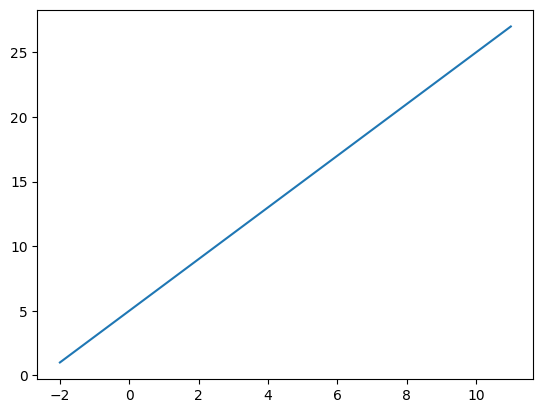

[-2 -1  0  1  2  3  4  5  6  7  8  9 10 11] 
 [ 1  3  5  7  9 11 13 15 17 19 21 23 25 27]


In [275]:
import matplotlib.pyplot as plt

xs = np.arange(-2, 12, 1)
xs

def f (x):
  return 2*x + 5

def generate_examples(input_list):

   plt.plot(input_list, f(input_list))
   plt.show()
   return f(input_list)

print(xs, "\n", generate_examples(xs))

In [276]:
## our data in tensor form
x = torch.tensor([[-2.0], [-1.0], [3.0], [4.0], [6.0], [0.0]], dtype=torch.float)
y = torch.tensor([[1.0], [3.0], [11.0], [13.0], [17.0], [5.0]], dtype=torch.float)

In [277]:
x.shape, y.shape

(torch.Size([6, 1]), torch.Size([6, 1]))

In [287]:
class NeuralNetwork(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer = nn.Linear(1, 1, bias=True)

  def forward(self, x):
    return self.layer(x)

nn101 = NeuralNetwork()

#print the weights and bias of Linear Layer
print(list(nn101.parameters()))

[Parameter containing:
tensor([[0.1109]], requires_grad=True), Parameter containing:
tensor([0.6712], requires_grad=True)]


In [288]:
nn101

NeuralNetwork(
  (layer): Linear(in_features=1, out_features=1, bias=True)
)

In [289]:
import matplotlib.pyplot as plt

losses = []

## training
def train_model(model, x, y, epochs=150):

  ## loss function
  mse = nn.MSELoss()

  ## optimizer algorithm  (one alternative to SGD is Adam)
  optimizer = optim.SGD(model.parameters(), lr=0.01)

  for epoch in range(epochs):
      model.train() # signal that we are in training mode - should be added after each epoch

      # forward pass: compute predicted targets by passing inputs to the model
      output = model(x)

      # loss: compute loss according to the selected loss function
      loss = mse(output, y)

      # reset gradient (as we are not training a recurrent neural network)
      optimizer.zero_grad()

      # backward pass: compute gradient of the loss with respect to model parameters
      loss.backward()

      # call the step function on an Optimizer to make an update of weights and biases
      optimizer.step()

      # save loss value for later
      losses.append(loss.item())

      print('Epoch: %d | Loss: %.4f' %(epoch, loss.item()))

def show_loss(losses):
  # plotting the loss evolution during training
  plt.plot(losses)
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.title('Training Loss')
  plt.show()

In [290]:
train_model(nn101, x, y)

Epoch: 0 | Loss: 85.2543
Epoch: 1 | Loss: 55.4187
Epoch: 2 | Loss: 37.3940
Epoch: 3 | Loss: 26.4593
Epoch: 4 | Loss: 19.7820
Epoch: 5 | Loss: 15.6626
Epoch: 6 | Loss: 13.0810
Epoch: 7 | Loss: 11.4254
Epoch: 8 | Loss: 10.3285
Epoch: 9 | Loss: 9.5697
Epoch: 10 | Loss: 9.0167
Epoch: 11 | Loss: 8.5901
Epoch: 12 | Loss: 8.2419
Epoch: 13 | Loss: 7.9436
Epoch: 14 | Loss: 7.6778
Epoch: 15 | Loss: 7.4339
Epoch: 16 | Loss: 7.2057
Epoch: 17 | Loss: 6.9893
Epoch: 18 | Loss: 6.7822
Epoch: 19 | Loss: 6.5829
Epoch: 20 | Loss: 6.3905
Epoch: 21 | Loss: 6.2044
Epoch: 22 | Loss: 6.0241
Epoch: 23 | Loss: 5.8492
Epoch: 24 | Loss: 5.6796
Epoch: 25 | Loss: 5.5149
Epoch: 26 | Loss: 5.3551
Epoch: 27 | Loss: 5.1999
Epoch: 28 | Loss: 5.0492
Epoch: 29 | Loss: 4.9029
Epoch: 30 | Loss: 4.7609
Epoch: 31 | Loss: 4.6230
Epoch: 32 | Loss: 4.4890
Epoch: 33 | Loss: 4.3590
Epoch: 34 | Loss: 4.2327
Epoch: 35 | Loss: 4.1101
Epoch: 36 | Loss: 3.9910
Epoch: 37 | Loss: 3.8754
Epoch: 38 | Loss: 3.7632
Epoch: 39 | Loss: 3.6542
E

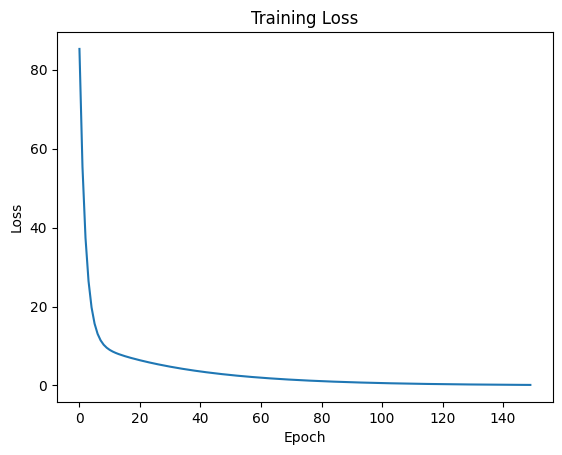

In [291]:
show_loss(losses)

In [293]:
def evaluate_model(model, test_value):

  model.eval() # say that the model is now in evaluation mode

  ## test the model
  sample = torch.tensor([test_value], dtype=torch.float) # 1.0 7.0 10.0
  predicted = model(sample)
  print("Original values: ", 2*test_value + 5)
  print("Predicted values: ", predicted.item())

evaluate_model(nn101, 1.0)

Original values:  7.0
Predicted values:  6.637948036193848


# Chapter 3: Cartesian to Polar Coordinates

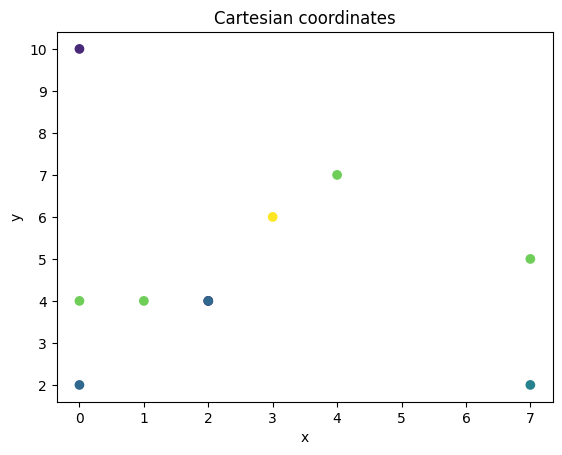

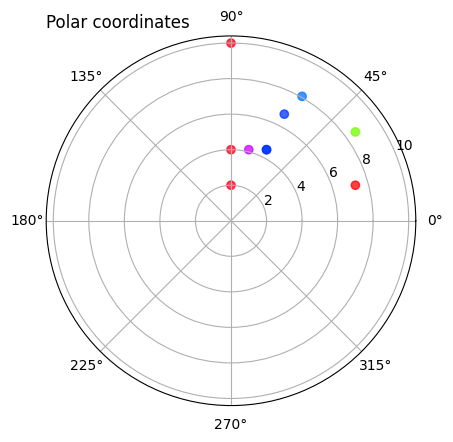

Cartersian coordinates (x, y):  tensor([[ 2.,  4.],
        [ 1.,  4.],
        [ 3.,  6.],
        [ 2.,  4.],
        [ 0.,  4.],
        [ 0., 10.],
        [ 4.,  7.],
        [ 7.,  5.],
        [ 7.,  2.],
        [ 0.,  2.]])
Polar coordinates (r, theta):  tensor([[ 4.4721,  1.1071],
        [ 4.1231,  1.3258],
        [ 6.7082,  1.1071],
        [ 4.4721,  1.1071],
        [ 4.0000,  1.5708],
        [10.0000,  1.5708],
        [ 8.0623,  1.0517],
        [ 8.6023,  0.6202],
        [ 7.2801,  0.2783],
        [ 2.0000,  1.5708]])


In [295]:
import random
import matplotlib.pyplot as plt
import numpy as np

N = 10
c = np.random.randint(0, N, size=N)

x = []
y = []
for _ in range(N):
    x.append(random.randint(0, N+1))
    y.append(random.randint(0, N+1))

radius = [np.sqrt(x**2 + y**2) for x, y in zip(x, y)]
theta = [np.arctan2(y, x) for x, y in zip(x, y)]

u = [[a, b] for a, b in zip(x, y)]
X = torch.tensor(u, dtype=torch.float)

v = [[a, b] for a, b in zip(radius, theta)]
Y = torch.tensor(v, dtype=torch.float)

plt.scatter(x, y, c=c)
plt.title('Cartesian coordinates')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

colors = theta
plt.axes(projection='polar')
plt.scatter(theta, radius, c=colors, cmap='hsv', alpha=0.75)
plt.title('Polar coordinates', loc='left')
plt.show()

print("Cartersian coordinates (x, y): ", X)
print("Polar coordinates (r, theta): ", Y)

In [296]:
len(x), len(y), len(radius), len(theta)

(10, 10, 10, 10)

In [297]:
X.shape

torch.Size([10, 2])

In [298]:
Y.shape

torch.Size([10, 2])

In [305]:
class NeuralNetwork(nn.Module):
  def __init__(self):
    super().__init__()

    '''
    self.layer = nn.Linear(2, 2, bias=False)
    '''
    self.fc = nn.Sequential(
        nn.Linear(2, 100),
        nn.ReLU(),
        nn.Linear(100, 100),
        nn.ReLU(),
        nn.Linear(100, 2))


  def forward(self, x):
    #output = self.layer(x)
    output = self.fc(x)
    return output

nn102 = NeuralNetwork()

#print the weights and bias of Linear Layer
#print(list(nn102.parameters()))
nn102

NeuralNetwork(
  (fc): Sequential(
    (0): Linear(in_features=2, out_features=100, bias=True)
    (1): ReLU()
    (2): Linear(in_features=100, out_features=100, bias=True)
    (3): ReLU()
    (4): Linear(in_features=100, out_features=2, bias=True)
  )
)

In [306]:
import matplotlib.pyplot as plt


## training
def train_model(model, x, y, epochs=750):

  losses = []

  ## loss function
  mse = nn.MSELoss()

  ## optimizer algorithm
  optimizer = optim.SGD(model.parameters(), lr=0.01)

  for epoch in range(epochs):
      model.train() # signal that we are in training mode - should be added after each epoch

      # forward pass: compute predicted targets by passing inputs to the model
      output = model(x)

      # loss: compute loss according to the selected loss function
      loss = mse(output, y)

      # reset gradient (as we are not training a recurrent neural network)
      optimizer.zero_grad()

      # backward pass: compute gradient of the loss with respect to model parameters
      loss.backward()

      # call the step function on an Optimizer to make an update of weights and biases
      optimizer.step()

      # save loss value for later
      losses.append(loss.item())

      print('Epoch: %d | Loss: %.4f' %(epoch, loss.item()))

  show_loss(losses)

def show_loss(losses):
  # plotting the loss evolution during training
  plt.plot(losses)
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.title('Training Loss')
  plt.show()

Epoch: 0 | Loss: 23.5148
Epoch: 1 | Loss: 0.5519
Epoch: 2 | Loss: 0.7209
Epoch: 3 | Loss: 1.4160
Epoch: 4 | Loss: 1.5995
Epoch: 5 | Loss: 3.5883
Epoch: 6 | Loss: 2.0546
Epoch: 7 | Loss: 4.6150
Epoch: 8 | Loss: 1.7045
Epoch: 9 | Loss: 3.6880
Epoch: 10 | Loss: 1.7542
Epoch: 11 | Loss: 3.7386
Epoch: 12 | Loss: 1.6517
Epoch: 13 | Loss: 3.4411
Epoch: 14 | Loss: 1.6100
Epoch: 15 | Loss: 3.2947
Epoch: 16 | Loss: 1.5554
Epoch: 17 | Loss: 3.1266
Epoch: 18 | Loss: 1.5044
Epoch: 19 | Loss: 2.9711
Epoch: 20 | Loss: 1.4570
Epoch: 21 | Loss: 2.8151
Epoch: 22 | Loss: 1.4116
Epoch: 23 | Loss: 2.6967
Epoch: 24 | Loss: 1.3659
Epoch: 25 | Loss: 2.5486
Epoch: 26 | Loss: 1.3188
Epoch: 27 | Loss: 2.4361
Epoch: 28 | Loss: 1.2762
Epoch: 29 | Loss: 2.3040
Epoch: 30 | Loss: 1.2292
Epoch: 31 | Loss: 2.1963
Epoch: 32 | Loss: 1.1875
Epoch: 33 | Loss: 2.0778
Epoch: 34 | Loss: 1.1437
Epoch: 35 | Loss: 1.9809
Epoch: 36 | Loss: 1.1044
Epoch: 37 | Loss: 1.8734
Epoch: 38 | Loss: 1.0623
Epoch: 39 | Loss: 1.7828
Epoch: 40

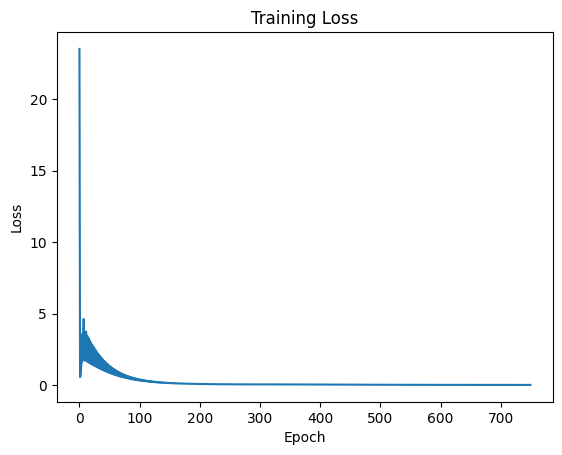

In [307]:
train_model(nn102, X, Y)

In [311]:
# evaluate the model using one example
def evaluate_model(model, test_value):

  model.eval() # model in evaluation mode, see https://stackoverflow.com/a/66843176

  ## test the model
  sample = torch.tensor([test_value], dtype=torch.float)
  predicted = model(sample)
  r = np.sqrt(test_value[0]**2 + test_value[1]**2)
  theta = np.arctan2(test_value[1], test_value[0])
  np.set_printoptions(legacy='1.25')

  print("Original values: ", [r, theta])
  print("Predicted values: ", predicted.tolist())

evaluate_model(nn102, [-10.0, 7.0] ) # [-9.0, 12.0] [-10.0, 7.0] [-1.0, 5.0]

Original values:  [12.206555615733702, 2.5308666892005847]
Predicted values:  [[8.544181823730469, 2.966453790664673]]


Final Model

NeuralNetwork(
  (fc): Sequential(
    (0): Linear(in_features=2, out_features=100, bias=True)
    (1): ReLU()
    (2): Linear(in_features=100, out_features=50, bias=True)
    (3): ReLU()
    (4): Linear(in_features=50, out_features=2, bias=True)
  )
)
Epoch 1/200, Loss: 343.8038
Epoch 10/200, Loss: 7.4996
Epoch 20/200, Loss: 6.8989
Epoch 30/200, Loss: 6.4278
Epoch 40/200, Loss: 6.1152
Epoch 50/200, Loss: 5.6411
Epoch 60/200, Loss: 5.4751
Epoch 70/200, Loss: 5.2707
Epoch 80/200, Loss: 5.0507
Epoch 90/200, Loss: 4.8428
Epoch 100/200, Loss: 4.5316
Epoch 110/200, Loss: 4.4787
Epoch 120/200, Loss: 4.2676
Epoch 130/200, Loss: 4.0971
Epoch 140/200, Loss: 3.9382
Epoch 150/200, Loss: 3.7906
Epoch 160/200, Loss: 3.7182
Epoch 170/200, Loss: 3.5857
Epoch 180/200, Loss: 3.4771
Epoch 190/200, Loss: 3.3329
Epoch 200/200, Loss: 3.2720


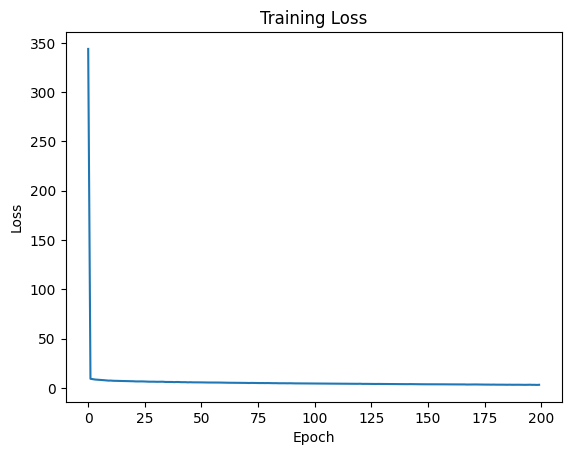

In [321]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt

# Dataset: generate random (x, y) and compute (r, theta)
def generate_data(num_samples=1000):
    x = np.random.uniform(-20, 20, num_samples)
    y = np.random.uniform(-20, 20, num_samples)
    r = np.sqrt(x**2 + y**2)
    theta = np.arctan2(y, x)
    inputs = np.stack((x, y), axis=1).astype(np.float32)
    targets = np.stack((r, theta), axis=1).astype(np.float32)
    return torch.from_numpy(inputs), torch.from_numpy(targets)

# Define the model
class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc = nn.Sequential(
            nn.Linear(2, 100),
            nn.ReLU(),
            nn.Linear(100, 50),
            nn.ReLU(),
            nn.Linear(50, 2))

    def forward(self, x):
        return self.fc(x)

# MAPE loss function
def mape(output, target):

    return torch.mean(torch.abs((target - output) / target))

def show_loss(losses):
  # plotting the loss evolution during training
  plt.plot(losses)
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.title('Training Loss')
  plt.show()

# Training function
def train_model(model, inputs, targets, epochs=200, batch_size=64):

    losses = []

    dataset = torch.utils.data.TensorDataset(inputs, targets) # https://docs.pytorch.org/docs/stable/data.html
    dataloader = torch.utils.data.DataLoader(dataset, batch_size=batch_size, shuffle=True)

    # print the model
    print(model)

    # loss function
    mse = nn.MSELoss()

    # optimizer algorithm
    optimizer = optim.SGD(model.parameters(), lr=0.001)

    for epoch in range(epochs):

        model.train() # signal that we are in training mode - should be added after each epoch
        total_loss = 0.0

        for batch_inputs, batch_targets in dataloader:
            optimizer.zero_grad() # clear the gradients of all optimized tensors

            # forward pass: compute predicted targets by passing inputs to the model
            outputs = model(batch_inputs)

            # loss: compute loss according to the selected loss function
            loss = mse(outputs, batch_targets)

            # backward pass: compute gradient of the loss with respect to model parameters
            loss.backward()

            # call the step function on an Optimizer to make an update of weights and biases
            optimizer.step()

            total_loss += loss.item()

        # save loss values for plotting
        losses.append(total_loss)
        if (epoch + 1) % 10 == 0 or epoch == 0:
            print(f"Epoch {epoch+1}/{epochs}, Loss: {total_loss:.4f}")

    show_loss(losses)
    path = "my_torch_model16052025.pt"
    torch.save(model.state_dict(), path)

# Generate data
inputs, targets = generate_data()

# Train the model
model = NeuralNetwork()
train_model(model, inputs, targets)

In [251]:
inputs.shape, targets.shape

(torch.Size([1000, 2]), torch.Size([1000, 2]))

In [252]:
inputs

tensor([[-11.6745,   7.9676],
        [-15.9338,  -3.9535],
        [ 19.4093,  -9.0631],
        ...,
        [  8.1498,  17.4880],
        [  7.3337, -14.0193],
        [  9.6621,  -2.8391]])

In [253]:
targets

tensor([[14.1343,  2.5427],
        [16.4170, -2.8984],
        [21.4211, -0.4369],
        ...,
        [19.2938,  1.1347],
        [15.8216, -1.0888],
        [10.0706, -0.2858]])

In [313]:
# evaluate the model using one example
def evaluate_model(model, test_value):

  model.eval() # model in evaluation mode, see https://stackoverflow.com/a/66843176

  ## test the model
  sample = torch.tensor([test_value], dtype=torch.float)
  predicted = model(sample)
  r = np.sqrt(test_value[0]**2 + test_value[1]**2)
  theta = np.arctan2(test_value[1], test_value[0])
  np.set_printoptions(legacy='1.25')

  print("Original values: ", [r, theta])
  print("Predicted values: ", predicted.tolist())

evaluate_model(model, [-1.0, 5.0]) # [-9.0, 12.0] [-10.0, 7.0] [-1.0, 5.0]

Original values:  [5.0990195135927845, 1.7681918866447774]
Predicted values:  [[5.08884859085083, 1.1779139041900635]]


Mean r error: 0.0953
Mean θ error (rad): 0.4333


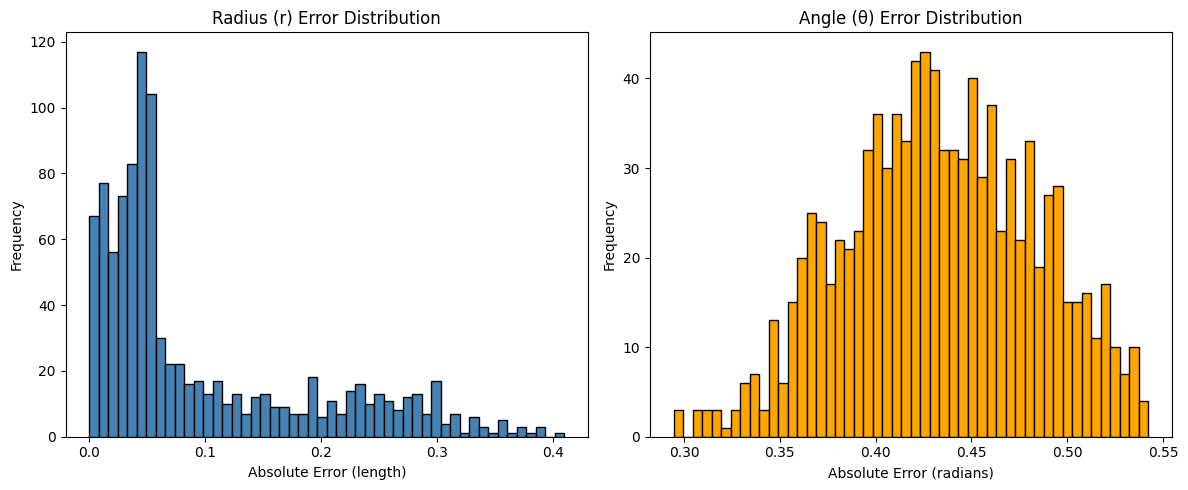

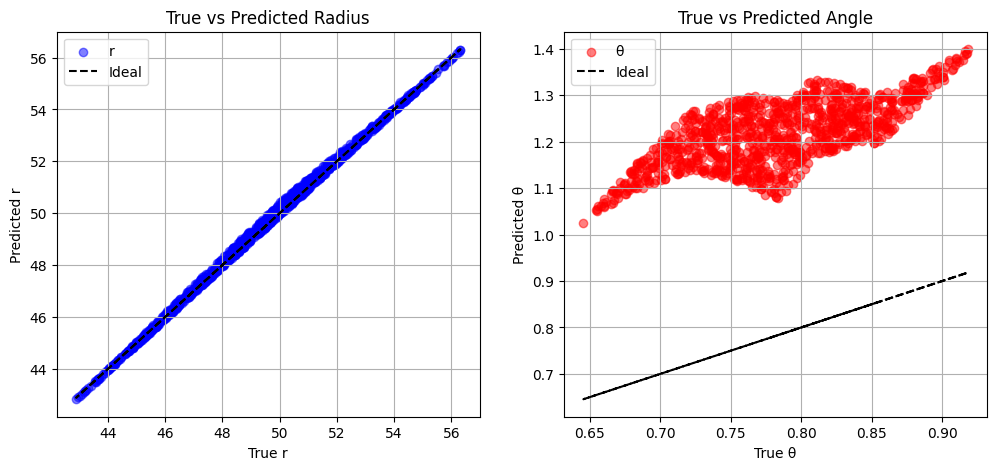

In [316]:
# evaluate the model using new examples
def evaluate_model(model, num_samples=1000):

    # generate new unseen data
    x, y = np.random.uniform(30, 40, num_samples), np.random.uniform(30, 40, num_samples)

    true_radius = np.sqrt(x**2 + y**2)
    true_theta = np.arctan2(y, x)

    input_coordinates = torch.from_numpy(np.stack((x, y), axis=1).astype(np.float32))
    output = model(input_coordinates)

    pred_radius, pred_theta =  output[:, 0], output[:, 1]

    #pred_radius = pred_radius.detach().numpy() (can be used as an alternative to torch_no.grad())
    #pred_theta = pred_theta.detach().numpy()

    with torch.no_grad():
      pred_radius = pred_radius.numpy()
      pred_theta = pred_theta.numpy()

    # compute (mean) errors
    r_error = np.abs(pred_radius - true_radius)
    theta_error = np.abs(pred_theta - true_theta)

    print(f"Mean r error: {np.mean(r_error):.4f}")
    print(f"Mean θ error (rad): {np.mean(theta_error):.4f}")

    # error histograms
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.hist(r_error, bins=50, color='steelblue', edgecolor='black')
    plt.title('Radius (r) Error Distribution')
    plt.xlabel('Absolute Error (length)')
    plt.ylabel('Frequency')

    plt.subplot(1, 2, 2)
    plt.hist(theta_error, bins=50, color='orange', edgecolor='black')
    plt.title('Angle (θ) Error Distribution')
    plt.xlabel('Absolute Error (radians)')
    plt.ylabel('Frequency')

    plt.tight_layout()
    plt.show()

    # scatter plot of true vs predicted
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)

    plt.scatter(true_radius, pred_radius, alpha=0.5, label='r', c='blue')
    plt.xlabel("True r")
    plt.ylabel("Predicted r")
    plt.plot(true_radius, true_radius, 'k--', label="Ideal")
    plt.legend()
    plt.title("True vs Predicted Radius")
    plt.grid(True)

    plt.subplot(1, 2, 2)
    plt.scatter(true_theta, pred_theta, alpha=0.5, label='θ', c='red')
    plt.xlabel("True θ")
    plt.ylabel("Predicted θ")
    plt.plot(true_theta, true_theta, 'k--', label="Ideal")
    plt.legend()
    plt.title("True vs Predicted Angle")
    plt.grid(True)
    plt.show()

evaluate_model(model)

# Chapter 4: Saving and reusing a trained model

Saving

In [256]:
path = "my_torch_model.pt"
torch.save(model.state_dict(), path)

Reusing

In [257]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt

In [323]:
checkpoint_path = "my_torch_model16052025.pt"

# Define the model
class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc = nn.Sequential(
            nn.Linear(2, 100),
            nn.ReLU(),
            nn.Linear(100, 50),
            nn.ReLU(),
            nn.Linear(50, 2))

    def forward(self, x):
        return self.fc(x)

trained_model = NeuralNetwork()
# load the weights of the trained model
checkpoint = torch.load(checkpoint_path, weights_only=True)
trained_model.load_state_dict(checkpoint)

<All keys matched successfully>

Mean r error: 0.1129
Mean θ error (rad): 0.5284


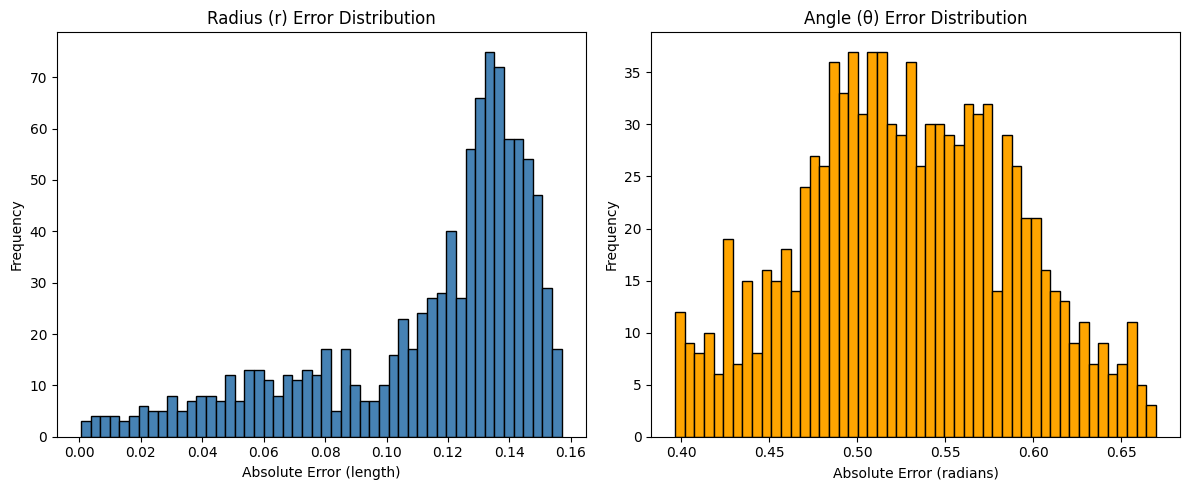

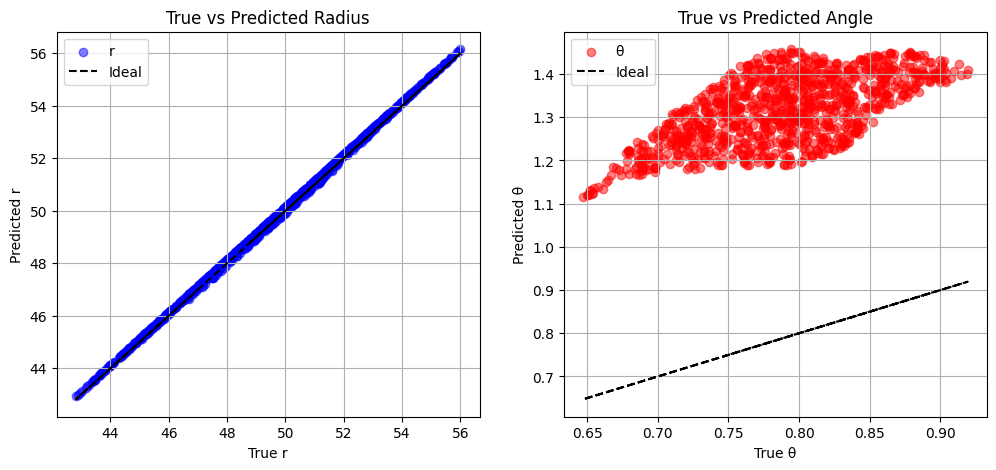

In [325]:
# evaluate the model using new examples
def evaluate_model(model, num_samples=1000):

    # generate new unseen data
    x, y =  np.random.uniform(30, 40, num_samples), np.random.uniform(30, 40, num_samples)

    true_radius = np.sqrt(x**2 + y**2)
    true_theta = np.arctan2(y, x)

    input_coordinates = torch.from_numpy(np.stack((x, y), axis=1).astype(np.float32))
    output = model(input_coordinates)

    pred_radius, pred_theta =  output[:, 0], output[:, 1]

    #pred_radius = pred_radius.detach().numpy() (can be used as an alternative to torch_no.grad())
    #pred_theta = pred_theta.detach().numpy()

    with torch.no_grad():
      pred_radius = pred_radius.numpy()
      pred_theta = pred_theta.numpy()

    # compute (mean) errors
    r_error = np.abs(pred_radius - true_radius)
    theta_error = np.abs(pred_theta - true_theta)

    print(f"Mean r error: {np.mean(r_error):.4f}")
    print(f"Mean θ error (rad): {np.mean(theta_error):.4f}")

    # error histograms
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.hist(r_error, bins=50, color='steelblue', edgecolor='black')
    plt.title('Radius (r) Error Distribution')
    plt.xlabel('Absolute Error (length)')
    plt.ylabel('Frequency')

    plt.subplot(1, 2, 2)
    plt.hist(theta_error, bins=50, color='orange', edgecolor='black')
    plt.title('Angle (θ) Error Distribution')
    plt.xlabel('Absolute Error (radians)')
    plt.ylabel('Frequency')

    plt.tight_layout()
    plt.show()

    # scatter plot of true vs predicted
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)

    plt.scatter(true_radius, pred_radius, alpha=0.5, label='r', c='blue')
    plt.xlabel("True r")
    plt.ylabel("Predicted r")
    plt.plot(true_radius, true_radius, 'k--', label="Ideal")
    plt.legend()
    plt.title("True vs Predicted Radius")
    plt.grid(True)

    plt.subplot(1, 2, 2)
    plt.scatter(true_theta, pred_theta, alpha=0.5, label='θ', c='red')
    plt.xlabel("True θ")
    plt.ylabel("Predicted θ")
    plt.plot(true_theta, true_theta, 'k--', label="Ideal")
    plt.legend()
    plt.title("True vs Predicted Angle")
    plt.grid(True)
    plt.show()

evaluate_model(trained_model)

# Project Work

* Exercice 01: use the function below to generate some data, and train a neural network that predicts the two classes from the spiral data (see below). A few tipps

  *   Use nn.BCEWithLogitsLoss() as loss criterion (It is[ more stable than](https://github.com/pytorch/pytorch/issues/39435#issuecomment-639386421)  BCELoss()),
  *  Where SGD as optimizer fails, Adam may still be successful
  *  Where some learning rates fail, others may still help you converge
  *  Because you are classifying a binary dataset, you will need sigmoid to convert logits to probabilities at some point in the process
  * The following [picture](https://cs231n.github.io/assets/nn3/learningrates.jpeg) and [picture](https://cs231n.github.io/assets/nn3/accuracies.jpeg) give you rough indication about how well the training process is going. For details, see the comments available [here](https://cs231n.github.io/neural-networks-3/#gradcheck)

* Exercice 02: Think about at least two examples, were predictive machine learning could be useful as a component in your own scenario

The notebook is to get started with the basics only (e.g. important notions such as regularization and weight decay are not introduced).

Happy coding!

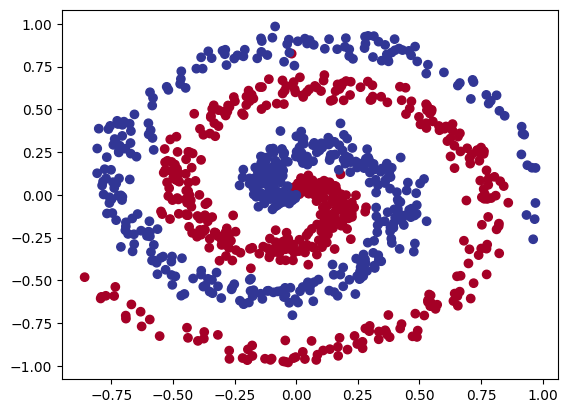

In [326]:
# Generate binary spiral data
def generate_spiral_data(points_per_class=500):
    X = np.zeros((points_per_class * 2, 2), dtype=np.float32)
    y = np.zeros(points_per_class * 2, dtype=np.float32)
    for j in range(2):
        ix = range(points_per_class * j, points_per_class * (j + 1))
        r = np.linspace(0.0, 1, points_per_class)
        t = np.linspace(j * 4, (j + 1) * 4, points_per_class) + np.random.randn(points_per_class) * 0.2
        X[ix] = np.c_[r * np.sin(t * 2.5), r * np.cos(t * 2.5)]
        y[ix] = j
    plt.scatter(X[:, 0], X[:, 1], c = y, cmap=plt.cm.RdYlBu) # for alternative color palettes, see https://matplotlib.org/stable/users/explain/colors/colormaps.html#qualitative
    plt.show()
    return torch.from_numpy(X), torch.from_numpy(y)

inputs, targets = generate_spiral_data()